* Lab 3
* Student Name : Aswani Pottathuparambil Unnikrishnan
* Student ID : 8858117

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


* By using this dataset we are going to classify a transaction, as either Fraudulent or not,  using logistic regression model. If the feature 'class' variable value is 1, it is considered a fraud transaction. If it is 0, it's a real transaction. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
cct_data = pd.read_csv('C:/Users/aswan/OneDrive/Desktop/AIML/creditcard.csv')
# Display 5 samples randomly
cct_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
275674,166667.0,-0.452566,0.740253,3.364446,4.862876,-0.661544,2.126840,-1.081443,-0.343320,0.091694,...,0.845564,0.665732,-0.177634,-0.091735,-0.541999,0.532604,0.173394,-0.045426,7.59,0
113352,73034.0,0.298344,-2.383652,-0.590386,-0.037724,-1.529421,-0.913259,0.415637,-0.375190,-0.635972,...,0.488848,0.078287,-0.663495,0.440049,0.533053,-0.123154,-0.127709,0.102764,593.75,0
47210,43134.0,-0.641519,0.793395,2.416822,0.876063,0.073184,0.523550,0.128147,-0.060832,-0.029503,...,0.178148,0.738198,-0.271081,-0.249715,-0.243755,-0.258061,-0.231826,-0.077764,7.98,0
103996,68876.0,-0.387509,-0.111313,1.109819,-1.916520,0.109872,-0.957098,0.596394,-0.165980,-1.312973,...,-0.078981,-0.505139,-0.062072,-0.105130,-0.176732,-0.649098,-0.133903,-0.125095,27.57,0
169982,119960.0,-0.461255,1.383225,0.171383,-0.588488,0.902435,-0.845999,0.949718,-1.036040,-0.510857,...,0.545820,-0.803223,0.139624,1.071312,-0.576584,0.064301,0.155787,0.211863,1.98,0


In [3]:
# Display the dataset size
cct_data.shape

(284807, 31)

In [4]:
# Get dataset details
cct_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# For more readability change the feature name Class into IsFraud
cct_data.rename(columns={'Class': 'IsFraud'}, inplace=True)
cct_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,IsFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Dispaly the IsFraud variable's unique values 
# 1 => Fraud transaction
# 0 => Real transaction
cct_data['IsFraud'].unique()

array([0, 1], dtype=int64)

In [7]:
# Real transactions dimension
cct_data[cct_data['IsFraud']==0].shape

(284315, 31)

In [8]:
# Fraud Transactions dimesnion
cct_data[cct_data['IsFraud']==1].shape

(492, 31)

In [9]:
# Check null values
cct_data.isnull().values.any()

False

In [10]:
# Remove duplicate values
print(f'Original data set dimension: {cct_data.shape}')
cct_data.shape
cct_data.drop_duplicates(inplace=True)
cct_data.shape
print(f'Data set dimension after removing duplicates: {cct_data.shape}')

Original data set dimension: (284807, 31)
Data set dimension after removing duplicates: (283726, 31)


In [11]:
# Standardize the Amount and Time column feature values for better model fit
scaler = StandardScaler()
cct_data['Amount'] = scaler.fit_transform(cct_data['Amount'].values.reshape(-1, 1))
cct_data['Time'] = scaler.fit_transform(cct_data['Time'].values.reshape(-1, 1))
cct_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,IsFraud
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [12]:
# Logistic Regression
X = cct_data.drop('IsFraud', axis=1)
y = cct_data['IsFraud']


In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1,
)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Perform prediction
y_prediction = model.predict(X_test)

In [15]:
# Evaluate the model
print (f"Confusion matrix :\n\n {confusion_matrix(y_test, y_prediction)}")
print(f"\n Accuracy: {accuracy_score(y_test, y_prediction)}")
print(f"precision: {precision_score(y_test, y_prediction)}")
print(f"Recall : {recall_score(y_test, y_prediction)}")


Confusion matrix :

 [[84979    14]
 [   50    75]]

 Accuracy: 0.9992481026339904
precision: 0.8426966292134831
Recall : 0.6


This model has a nice balance between accuracy and precision. However, the recall is not that high.


**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 

* Here we are going to predict the insurance charges based on different feature values such as Age, Sex, BMI, Smoker, Region, and the number of children. So, we need to build multivariate linear regression model. 

In [16]:
# Load the dataset
insurance_data = pd.read_csv('C:/Users/aswan/OneDrive/Desktop/AIML/insurance.csv')
# Display 5 samples randomly
insurance_data.sample(5)

,age,sex,bmi,children,smoker,region,charges
784,31,female,29.26,1,no,southeast,4350.5144
895,61,female,44.00,0,no,southwest,13063.8830
135,22,female,28.05,0,no,southeast,2155.6815
72,53,female,28.10,3,no,southwest,11741.7260
25,59,female,27.72,3,no,southeast,14001.1338


In [17]:
# Display the dataset size
insurance_data.shape

(1338, 7)

In [18]:
# Get dataset details
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
# Check null values
insurance_data.isnull().values.any()

False

In [20]:
# Check duplicate data count
insurance_data.duplicated().sum()

1

In [21]:
insurance_data.drop_duplicates(inplace=True)

In [22]:
# Convert categorical features into numerical 
encoder= LabelEncoder()
insurance_data['sex']= encoder.fit_transform(insurance_data['sex'])
insurance_data['smoker']= encoder.fit_transform(insurance_data['smoker'])
insurance_data['region']= encoder.fit_transform(insurance_data['region'])
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


In [23]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


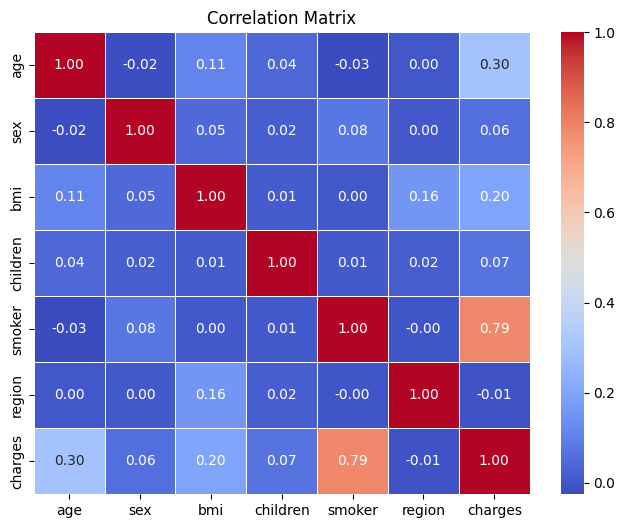

In [24]:
# Show Correlation matix
correlation_matrix = insurance_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In the confusion matrix, we can see a high positive correlation between 'smoker' feature and the target variable ('Charges'). When smoker value increase, the Charge also increases.

In [25]:
# Linear Regression
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Perform prediction
y_prediction = model.predict(X_test)

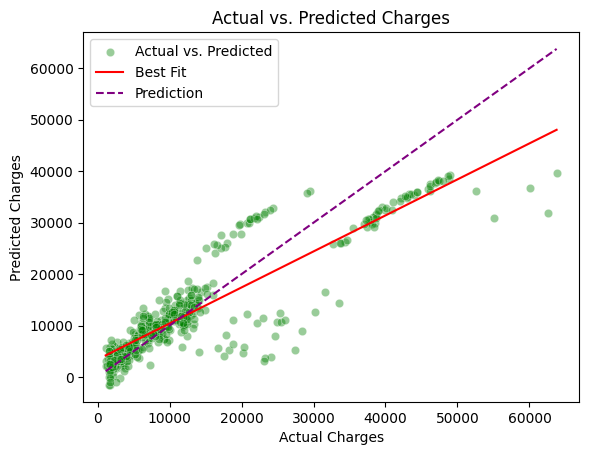

In [27]:
# Plot the actual and predicted line
sns.scatterplot(x=y_test, y=y_prediction, alpha=0.4, color='green', label='Actual vs. Predicted')
fit_line = np.polyfit(y_test, y_prediction, 1)
best_fit = np.polyval(fit_line, y_test)
sns.lineplot(x=y_test, y=best_fit, color='red', label='Best Fit')
sns.lineplot(x=y_test, y=y_test, color='purple', linestyle='--', label='Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.legend()
plt.show()

In [28]:
# Model Evaluation
print(f'MAE : {mean_absolute_error(y_test, y_prediction)}') 
print( f'MSE : {mean_squared_error(y_test, y_prediction)}')
print(f'RMSE : { np.sqrt(mean_squared_error(y_test, y_prediction))}')
print(f'R-Squared : {r2_score(y_test, y_prediction)}')

MAE : 4182.803777070158
MSE : 38935221.01064075
RMSE : 6239.809372940871
R-Squared : 0.7724652729621759


* The R-squared score of 0.77 suggests that the model is good at prediction. However, RMSE and MAE are relatively high. It indicates that there is potential for improvement in terms of more precise charge prediction For better performance. We need to reduce the RMSE and MAE.
